In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cambia 'multiTimeline.csv' al nombre y la ubicación de tu archivo CSV
archivo = 'multiTimeline_NVIDIA.csv'

df = pd.read_csv(archivo,names=['Date', 'Valor'])
df

,Date,Valor
0,2018-06-10,23
1,2018-06-17,23
2,2018-06-24,22
3,2018-07-01,23
4,2018-07-08,24
...,...,...
256,2023-05-07,41
257,2023-05-14,41
258,2023-05-21,43
259,2023-05-28,43


In [2]:
df.dtypes
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    261 non-null    object
 1   Valor   261 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    261 non-null    datetime64[ns]
 1   Valor   261 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


In [5]:
df

,Date,Valor
0,2018-06-10,23
1,2018-06-17,23
2,2018-06-24,22
3,2018-07-01,23
4,2018-07-08,24
...,...,...
256,2023-05-07,41
257,2023-05-14,41
258,2023-05-21,43
259,2023-05-28,43


In [6]:
df.set_index('Date', inplace=True)
df

,Valor
Date,
2018-06-10,23
2018-06-17,23
2018-06-24,22
2018-07-01,23
2018-07-08,24
...,...
2023-05-07,41
2023-05-14,41
2023-05-21,43


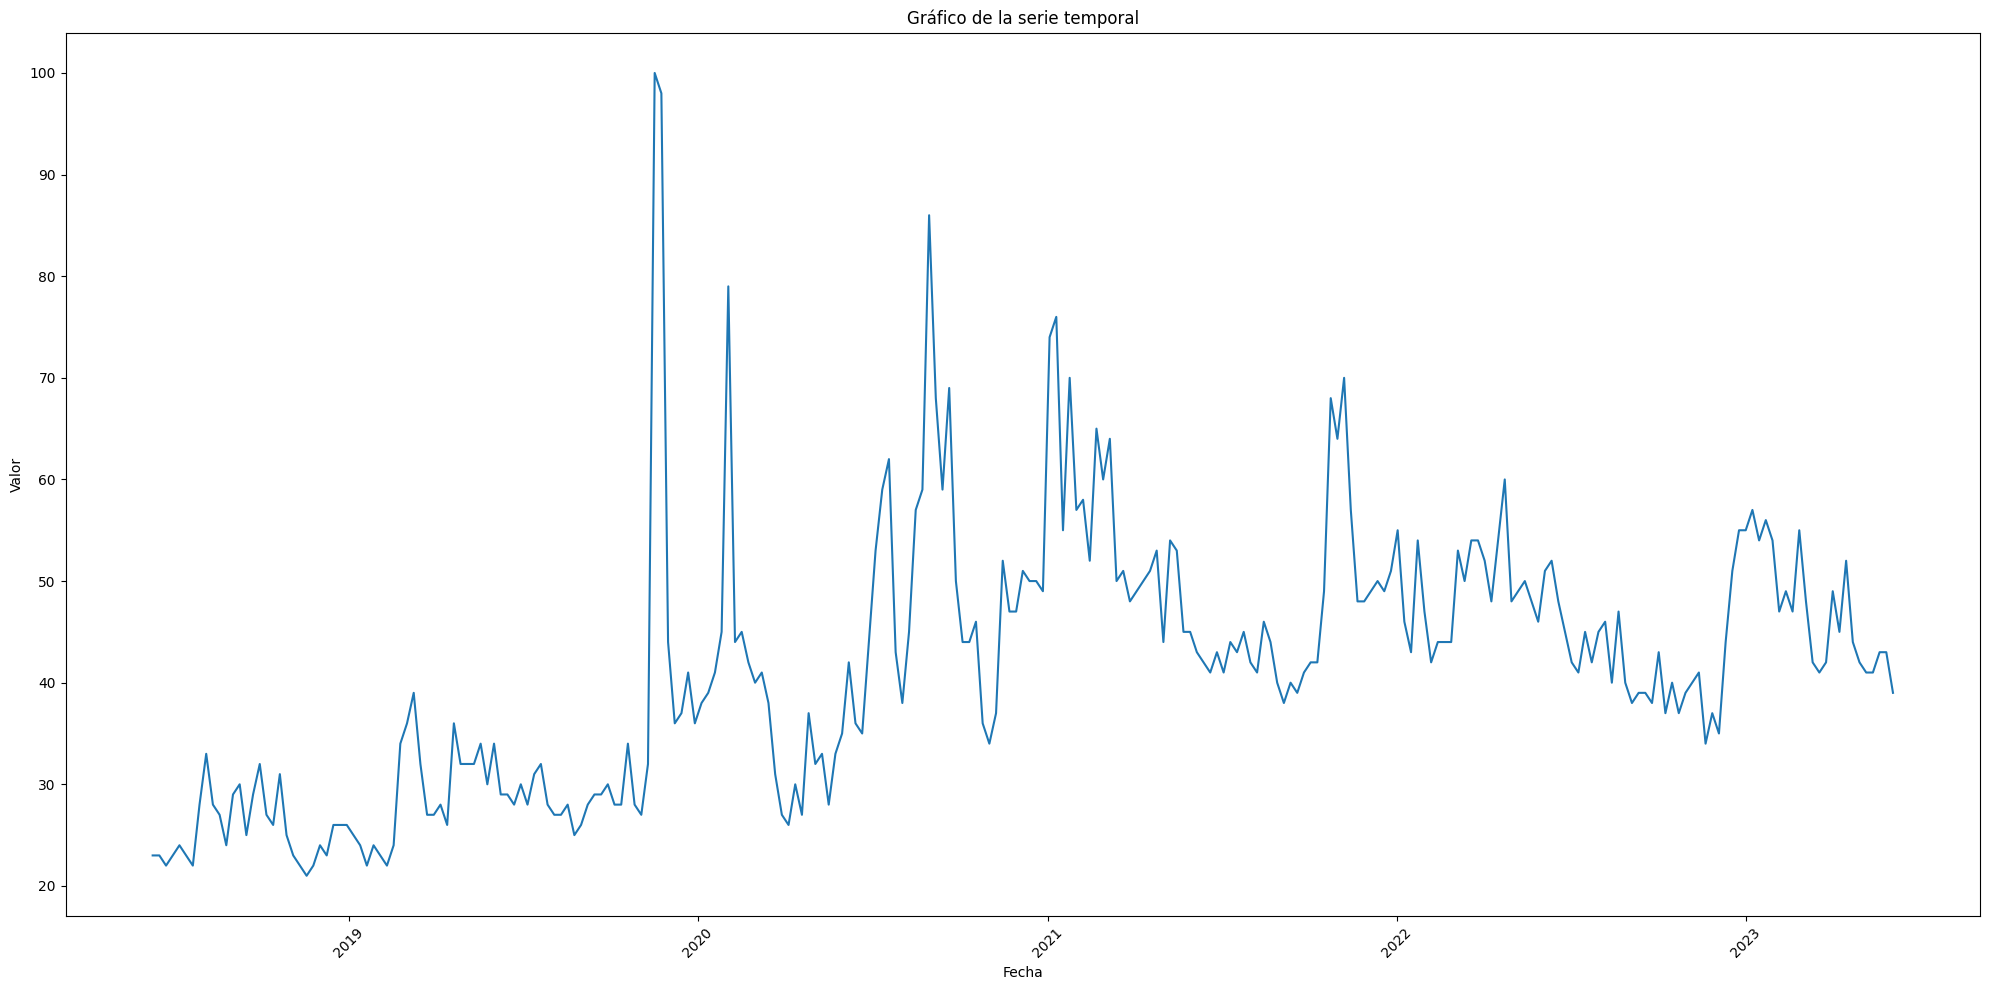

In [7]:
# Extraer las columnas de fecha y valor

valores = df['Valor']

# Graficar la serie temporal
plt.figure(figsize=(20, 10))
plt.plot(valores)

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Gráfico de la serie temporal')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [8]:
import yfinance as yf

# Descargar datos de precios de NVIDIA
nvidia = yf.download('NVDA', start='2018-06-10', end='2023-06-04')
nvidia

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-11,65.442497,65.862503,65.025002,65.154999,64.559975,26537200
2018-06-12,65.422501,65.767502,64.915001,65.644997,65.045494,31916000
2018-06-13,65.660004,66.417503,65.507500,65.599998,65.000916,33820800
2018-06-14,66.055000,67.300003,65.904999,66.727501,66.118126,43001600
2018-06-15,66.150002,66.870003,65.837502,66.315002,65.709373,43226000
...,...,...,...,...,...,...
2023-05-26,378.899994,391.700012,375.500000,389.459991,389.419678,71439700
2023-05-30,405.950012,419.380005,399.489990,401.109985,401.068481,92340100
2023-05-31,394.880005,402.950012,378.220001,378.339996,378.300842,100258000


In [9]:
nvidia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1254 entries, 2018-06-11 to 2023-06-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1254 non-null   float64
 1   High       1254 non-null   float64
 2   Low        1254 non-null   float64
 3   Close      1254 non-null   float64
 4   Adj Close  1254 non-null   float64
 5   Volume     1254 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.6 KB


In [10]:
nvidia.drop(["Open", "High", "Low", "Volume", "Adj Close"], axis=1, inplace=True)

In [11]:
nvidia["Close"] = nvidia["Close"].astype(int)
nvidia

,Close
Date,
2018-06-11,65
2018-06-12,65
2018-06-13,65
2018-06-14,66
2018-06-15,66
...,...
2023-05-26,389
2023-05-30,401
2023-05-31,378


In [12]:
nvidia_weekly = nvidia.resample('W').last()
valores_semanales = nvidia_weekly['Close']
#pd.set_option('display.max_rows', None)
df['Semanal']= valores_semanales
df

,Valor,Semanal
Date,,
2018-06-10,23,NaN
2018-06-17,23,66.0
2018-06-24,22,62.0
2018-07-01,23,59.0
2018-07-08,24,61.0
...,...,...
2023-05-07,41,286.0
2023-05-14,41,283.0
2023-05-21,43,312.0


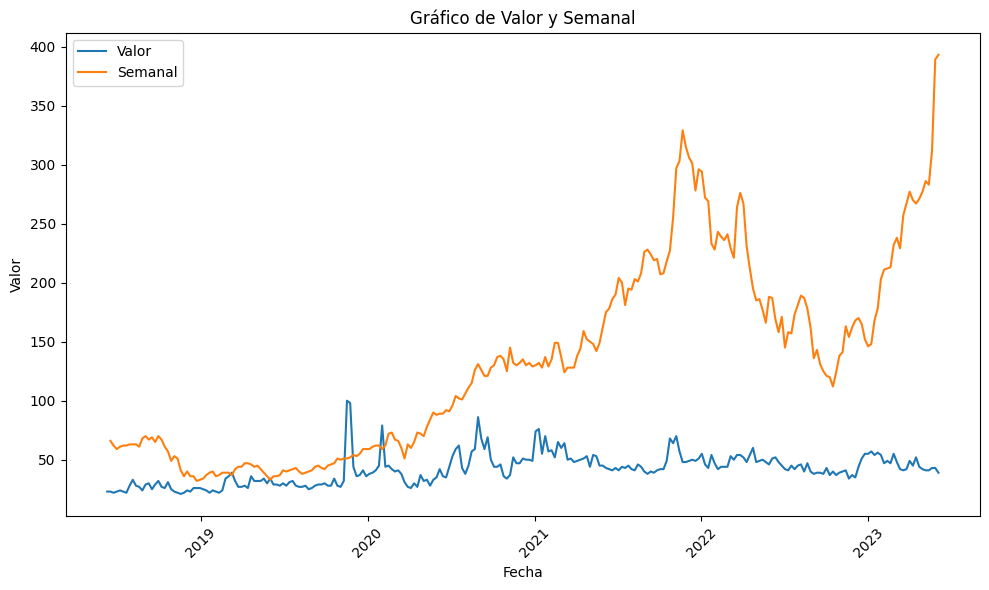

In [13]:
import matplotlib.pyplot as plt

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Valor'], label='Valor')
plt.plot(df.index, df['Semanal'], label='Semanal')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Gráfico de Valor y Semanal')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
fecha_inicio = '2021-01-01'
fecha_fin = '2023-06-30'

# Filtrar los datos del DataFrame entre las fechas de inicio y fin
df_slice = df[(df.index >= fecha_inicio) & (df.index <= fecha_fin)]
df_slice.head(9)

,Valor,Semanal
Date,,
2021-01-03,74,130.0
2021-01-10,76,132.0
2021-01-17,55,128.0
2021-01-24,70,137.0
2021-01-31,57,129.0
2021-02-07,58,135.0
2021-02-14,52,149.0
2021-02-21,65,149.0
2021-02-28,60,137.0


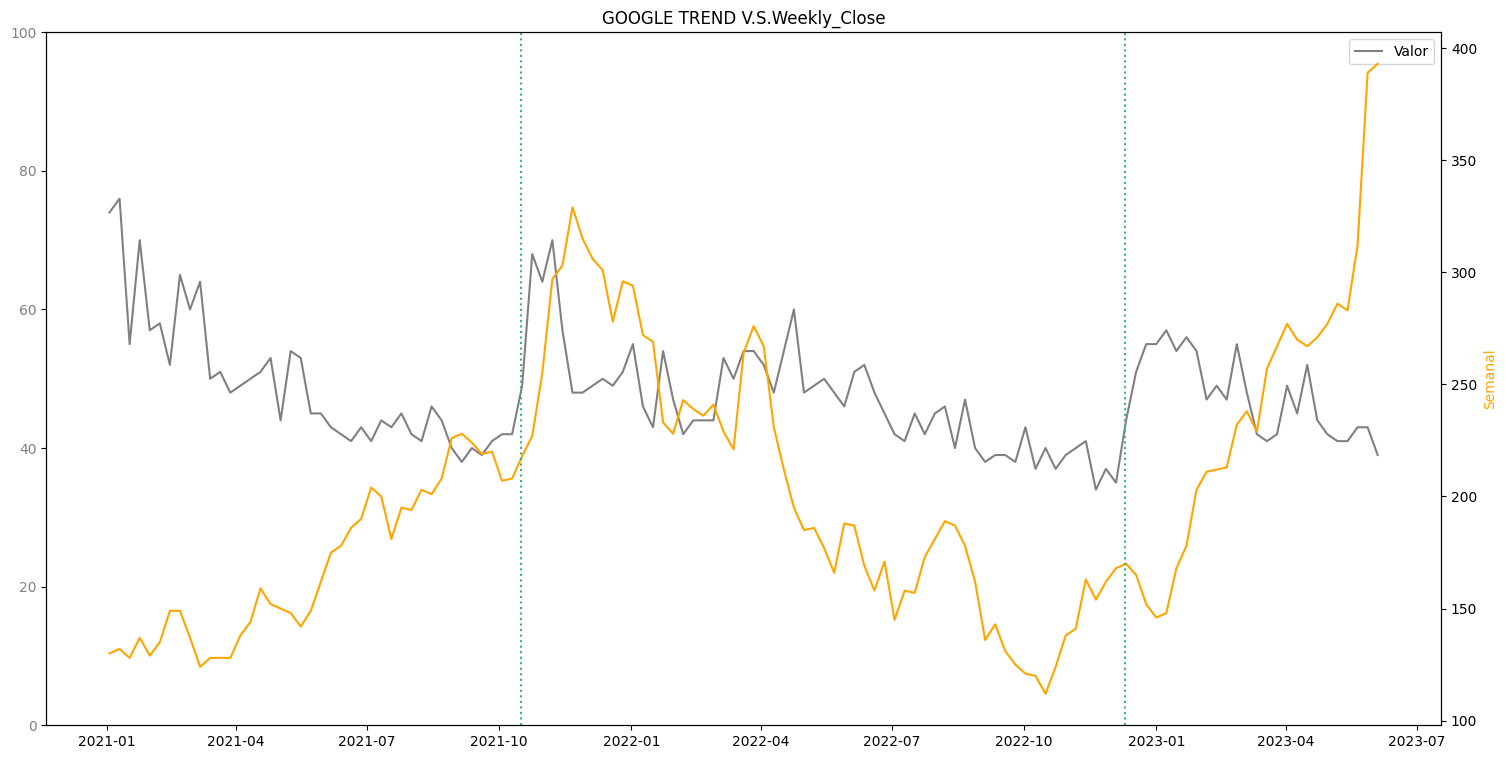

In [15]:
import matplotlib.pyplot as plt
import mpld3

# Crear el gráfico de líneas con eje de valores en el lado izquierdo
fig, ax1 = plt.subplots(figsize=(18, 9))

# Graficar la línea del campo "Valor" en el eje de la izquierda
ax1.plot(df_slice.index, df_slice['Valor'], color='Grey', label='Valor')
ax1.set_ylim([0, 100])  # Establecer el valor máximo en 120

# Configurar el eje de la izquierda
ax1.tick_params(axis='y', labelcolor='grey')

# Crear un segundo eje y para el campo "Semanal" en el lado derecho
ax2 = ax1.twinx()

# Graficar la línea del campo "Semanal" en el eje de la derecha
ax2.plot(df_slice.index, df_slice['Semanal'], color='orange', label='Semanal')
ax2.set_ylabel('Semanal', color='orange')

# Linea vertical1
fecha_especifica_1 = pd.to_datetime('2021-10-16')
ax2.axvline(x=fecha_especifica_1, color='MediumSeaGreen', linestyle='dotted', label='Vertical')

# Linea vertical2
fecha_especifica_2 = pd.to_datetime('2022-12-10')
ax2.axvline(x=fecha_especifica_2, color='MediumSeaGreen', linestyle='dotted', label='Vertical')

# Configurar el eje de la derecha
ax2

# Configurar el título y la leyenda del gráfico
ax1.set_title('GOOGLE TREND V.S.Weekly_Close')
ax1.legend()


In [16]:
from datetime import datetime, timedelta

#ENTRADA OCTUBRE 2021

dia_entrada = '2021-10-24'
fecha_entrada = pd.to_datetime(dia_entrada)
precio_compra = df_slice.loc[fecha_entrada , 'Semanal']

# Atención el valor que sumamos son semanas
start_index = df_slice.index.get_loc(dia_entrada)
time_in_market = 5
end_index = start_index + time_in_market #el valor son semanas
precio_venta = df_slice.iloc[end_index]['Semanal']

beneficio_accion = precio_venta - precio_compra
capital = 10000
titulos = int(capital/precio_compra)
beneficio_operacion = titulos * beneficio_accion
beneficio_operacion = '{:,.0f}'.format(beneficio_operacion)
rendimiento = round((beneficio_accion*100/precio_compra),1)

print("Fecha Entrada:",fecha_entrada)
print("Time in Market",time_in_market,"dias" )
print("Has comprado: ", titulos, " acciones-","Con un capital de:",capital,"$")
print("El Precio de Compra es:", precio_compra)
print("El Precio de Venta es: ", precio_venta)
print("El Beneficio por acción es: ", beneficio_accion, "Y el BENEFICIO TOTAL ES:", beneficio_operacion,"$")
print("La Rentabilidad operación es: ", rendimiento,"%" )

Fecha Entrada: 2021-10-24 00:00:00
Time in Market 5 dias
Has comprado:  44  acciones- Con un capital de: 10000 $
El Precio de Compra es: 227.0
El Precio de Venta es:  315.0
El Beneficio por acción es:  88.0 Y el BENEFICIO TOTAL ES: 3,872 $
La Rentabilidad operación es:  38.8 %


In [17]:
from datetime import datetime, timedelta

# ENTRADA ENERO 2023

dia_entrada = '2022-12-11'
fecha_entrada = pd.to_datetime(dia_entrada)
precio_compra = df_slice.loc[fecha_entrada , 'Semanal']

# Atención el valor que sumamos son semanas
start_index = df_slice.index.get_loc(dia_entrada)
time_in_market = 15
end_index = start_index + time_in_market #el valor son semanas
precio_venta = df_slice.iloc[end_index]['Semanal']

beneficio_accion = precio_venta - precio_compra
capital = 10000
titulos = int(capital/precio_compra)
beneficio_operacion = titulos * beneficio_accion
beneficio_operacion = '{:,.0f}'.format(beneficio_operacion)
rendimiento = round((beneficio_accion*100/precio_compra),1)

print("Fecha Entrada:",fecha_entrada)
print("Time in Market",time_in_market,"dias" )
print("Has comprado: ", titulos, " acciones-","Con un capital de:",capital,"$")
print("El Precio de Compra es:", precio_compra)
print("El Precio de Venta es: ", precio_venta)
print("El Beneficio por acción es: ", beneficio_accion, "Y el BENEFICIO TOTAL ES:", beneficio_operacion,"$")
print("La Rentabilidad operación es: ", rendimiento,"%" )

Fecha Entrada: 2022-12-11 00:00:00
Time in Market 15 dias
Has comprado:  58  acciones- Con un capital de: 10000 $
El Precio de Compra es: 170.0
El Precio de Venta es:  267.0
El Beneficio por acción es:  97.0 Y el BENEFICIO TOTAL ES: 5,626 $
La Rentabilidad operación es:  57.1 %
